In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
from matplotlib.ticker import ScalarFormatter


In [2]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')

In [4]:
df_ROS.head()

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
4,4,5PT,53.8,4,NaN,0.0,0,1,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0


In [6]:
df_ROS.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [7]:
df_data = df_ROS[['과거수술횟수','연령','환자통증정도','통증기간(월)','수술시간','디스크단면적','척추이동척도','척추전방위증','입원기간']]
df_data

,과거수술횟수,연령,환자통증정도,통증기간(월),수술시간,디스크단면적,척추이동척도,척추전방위증,입원기간
0,0,66,10,1.0,68.0,2048.50,Down,0,2
1,0,47,10,1.0,31.0,1753.10,Up,0,1
2,1,39,7,1.0,78.0,1749.00,Down,0,1
3,0,40,7,2.0,73.0,1796.20,Down,0,1
4,0,42,7,1.0,29.0,2021.48,Up,0,2
...,...,...,...,...,...,...,...,...,...
1889,0,59,7,12.0,80.0,2652.20,Middle,0,2
1890,0,42,7,6.0,20.0,1795.80,Down,0,4
1891,0,61,7,1.0,50.0,2624.40,Down,0,3
1892,0,29,7,24.0,25.0,1972.50,Down,0,4


In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   과거수술횟수   1894 non-null   int64  
 1   연령       1894 non-null   int64  
 2   환자통증정도   1894 non-null   int64  
 3   통증기간(월)  1890 non-null   float64
 4   수술시간     1840 non-null   float64
 5   디스크단면적   1893 non-null   float64
 6   척추이동척도   1894 non-null   object 
 7   척추전방위증   1894 non-null   int64  
 8   입원기간     1894 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 133.3+ KB


In [9]:
df_data[['과거수술횟수','환자통증정도','척추전방위증']] = df_data[['과거수술횟수','환자통증정도','척추전방위증']].astype(object)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   과거수술횟수   1894 non-null   object 
 1   연령       1894 non-null   int64  
 2   환자통증정도   1894 non-null   object 
 3   통증기간(월)  1890 non-null   float64
 4   수술시간     1840 non-null   float64
 5   디스크단면적   1893 non-null   float64
 6   척추이동척도   1894 non-null   object 
 7   척추전방위증   1894 non-null   object 
 8   입원기간     1894 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 133.3+ KB


C:\Users\82102\AppData\Local\Temp\ipykernel_5236\3117064172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data[['과거수술횟수','환자통증정도','척추전방위증']] = df_data[['과거수술횟수','환자통증정도','척추전방위증']].astype(object)


In [13]:
object_list = df_data.describe(include=object).columns.to_list()
object_list

['과거수술횟수', '환자통증정도', '척추이동척도', '척추전방위증']

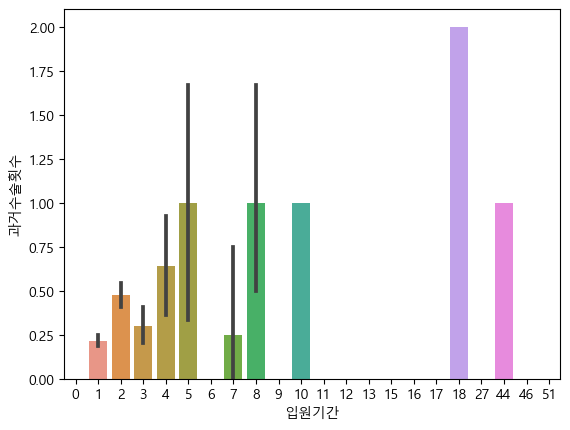

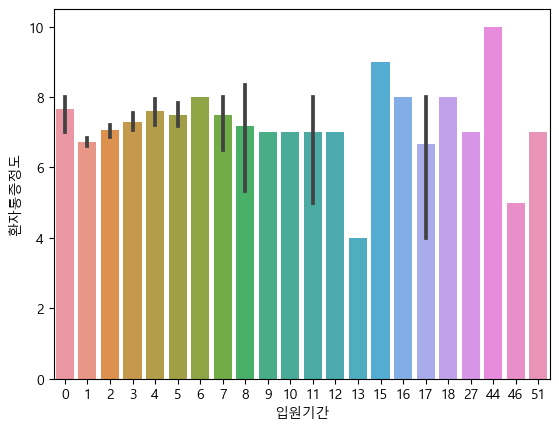

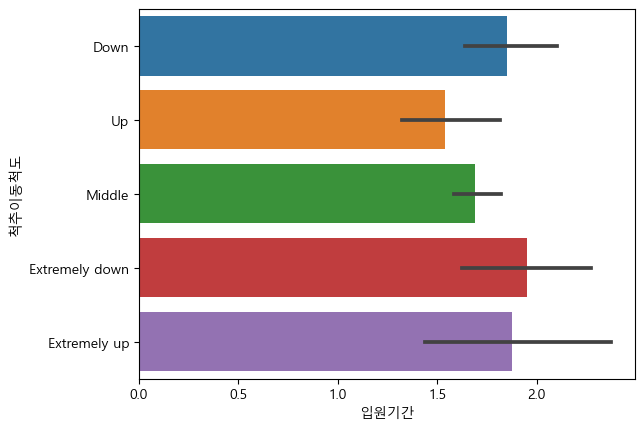

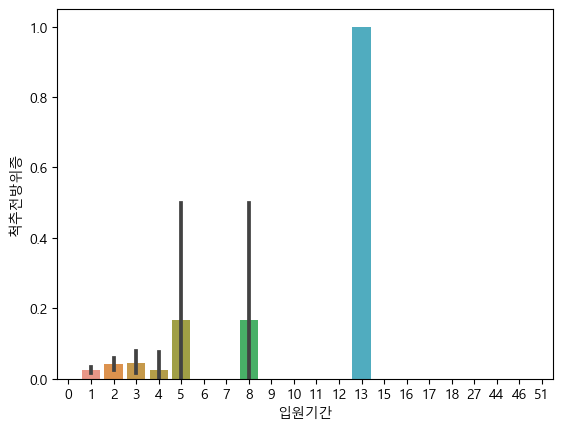

In [22]:
for row in object_list:
    sns.barplot(data=df_data, x='입원기간', y=row)
    plt.show()

In [44]:
df_pivot = df_data.groupby(['입원기간', '척추이동척도']).size().unstack(fill_value=0)
df_pivot
#unstack 함수를 사용하여 '척추이동척도' 범주를 컬럼으로 변환합니다. fill_value는 값이 없을 때 0으로 채워줌.

척추이동척도,Down,Extremely down,Extremely up,Middle,Up
입원기간,,,,,
0,1,0,0,2,0
1,295,19,7,787,44
2,136,9,5,321,12
3,56,7,3,106,8
4,15,5,1,18,0
5,1,0,0,5,0
6,2,0,0,2,0
7,1,0,0,3,0
8,0,0,0,5,1


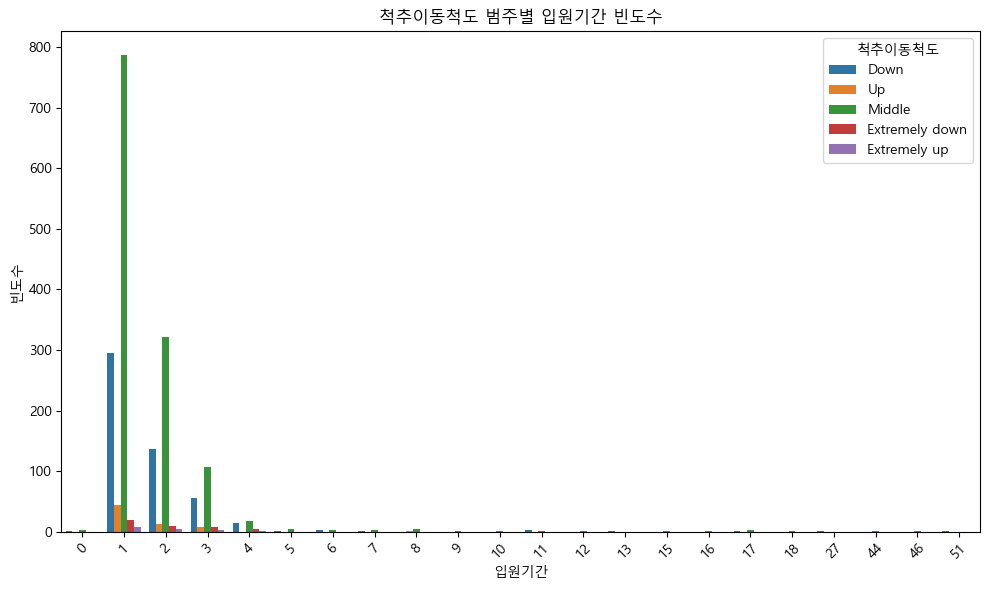

In [64]:
plt.figure(figsize=(10, 6))  # 그래프 크기 조정
sns.countplot(data=df_data, x='입원기간', hue='척추이동척도')
plt.xticks(rotation=45)
plt.xlabel('입원기간')
plt.ylabel('빈도수')
plt.title('척추이동척도 범주별 입원기간 빈도수')
plt.legend(title='척추이동척도')
plt.tight_layout()
plt.show()

In [24]:
df_data_pivot = pd.pivot_table(data=df_data, index='입원기간', values=['연령', '환자통증정도'], aggfunc='median')
df_data_pivot
sns.barplot(data=df_data_pivot, x='입원기간')

,연령,환자통증정도
입원기간,,
0,41.333333,7.666667
1,40.708333,6.711806
2,42.242236,7.049689
3,42.811111,7.288889
4,44.512821,7.615385
5,54.833333,7.500000
6,30.500000,8.000000
7,35.500000,7.500000
8,60.833333,7.166667


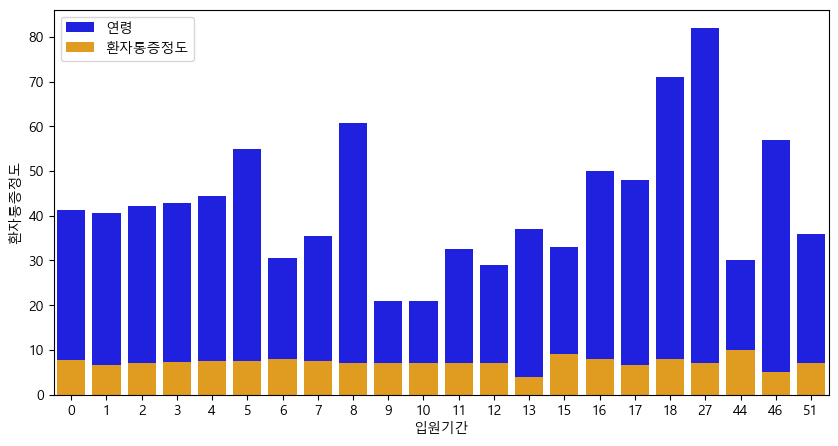

In [33]:
plt.figure(figsize=(10, 5))  # 그래프 크기 조정
sns.barplot(data=df_data_pivot, x=df_data_pivot.index, y='연령', color='blue', label='연령')
sns.barplot(data=df_data_pivot, x=df_data_pivot.index, y='환자통증정도', color='orange', label='환자통증정도')
plt.legend()  # 범례 추가
plt.show()

In [ ]:
분석 접근 방식
표현하는 데이터 타입
시각화 종류 :
단일변수 / 연속형 : hisplot
단일변수 / 범주형 : barplot
단일변수 / 순서형 : lineplot
현 데이터로 시각화 가능 여부
한 chart에 동시 표현 여부 : 레코드 분리 되어 있어야 함.
단일 변수 표현 시 주의점 : count 대치하는 변수 여부

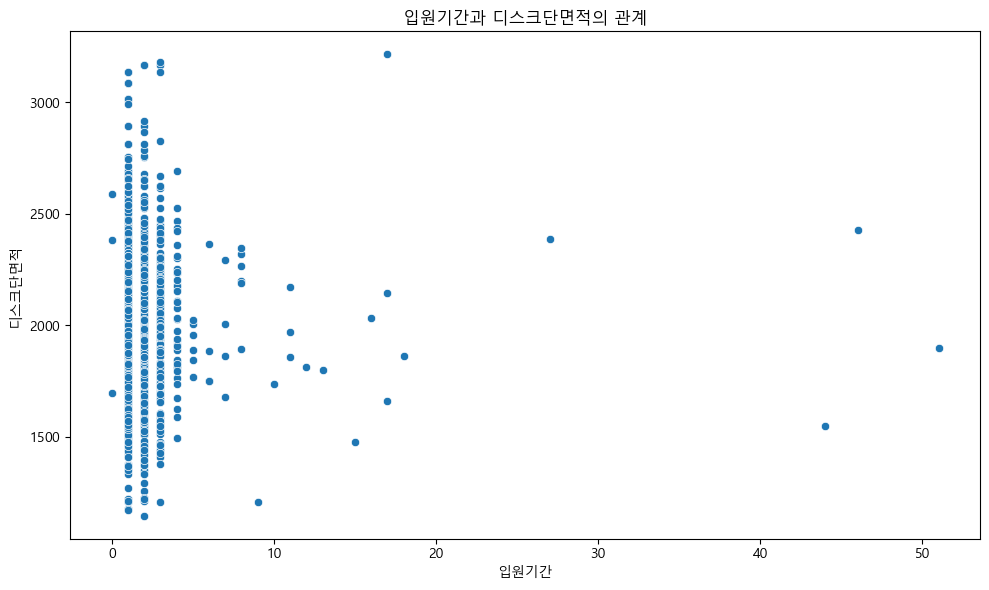

In [70]:
plt.figure(figsize=(10, 6))  # 그래프 크기 조정
ax = sns.scatterplot(data=df_data, x='입원기간', y='디스크단면적')
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=True, useLocale=True))
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xlabel('입원기간')
plt.title('입원기간과 디스크단면적의 관계')
plt.tight_layout()
plt.show()

C:\Users\82102\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


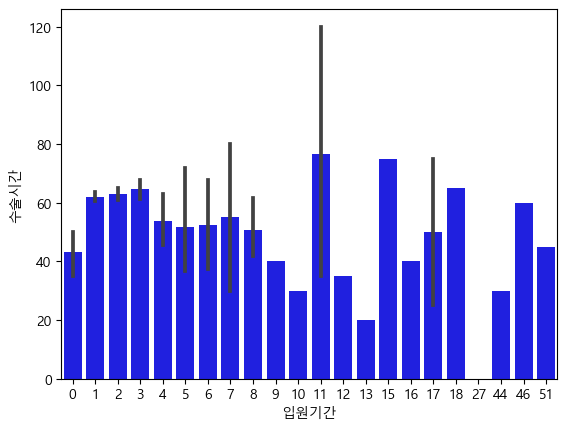

In [34]:
sns.barplot(data=df_data, x='입원기간', y='수술시간', color='blue')
plt.show()